In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import spacy


In [2]:
data = pd.read_csv('dataset.csv')
nlp = spacy.load("en_core_web_sm")
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [3]:
# Basic Info
print("Dataset Shape:", data.shape)
print("\nColumn Info:")
print(data.info())


Dataset Shape: (962, 2)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


In [4]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Category    0
Resume      0
dtype: int64


In [5]:
# Checking for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")



Number of Duplicate Rows: 796


In [6]:
# Unique categories
print("\nUnique Categories:")
print(data['Category'].value_counts())



Unique Categories:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


In [7]:
# Resume text analysis
data['word_count'] = data['Resume'].apply(lambda x: len(str(x).split()))
data['char_count'] = data['Resume'].apply(lambda x: len(str(x)))

print("\nSummary of Word and Character Count:")
print(data[['word_count', 'char_count']].describe())



Summary of Word and Character Count:
        word_count    char_count
count   962.000000    962.000000
mean    450.497921   3160.364865
std     415.868459   2886.528521
min      19.000000    142.000000
25%     166.000000   1217.250000
50%     329.000000   2355.000000
75%     589.250000   4073.750000
max    2209.000000  14816.000000


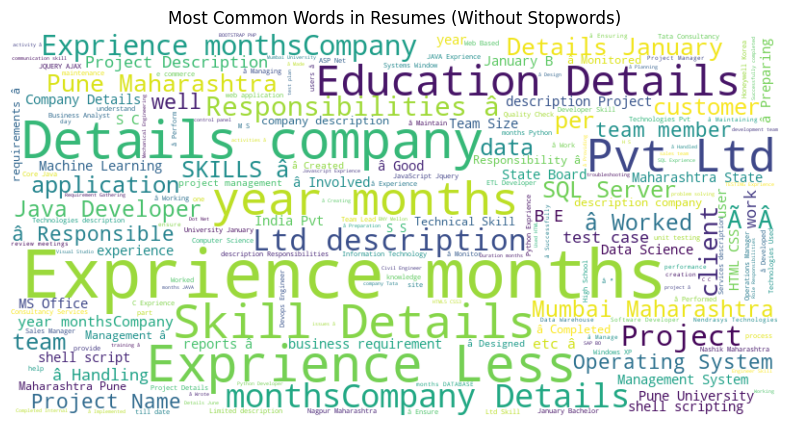

In [8]:
from wordcloud import STOPWORDS

# Word Cloud with Stopword Removal
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(" ".join(data['Resume']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Resumes (Without Stopwords)")
plt.show()


In [9]:
# Bigram Analysis
def get_top_bigrams(text_series, n=20):
    bigram_counts = Counter()
    for text in text_series:
        tokens = word_tokenize(str(text).lower())
        bigrams = list(ngrams(tokens, 2))
        bigram_counts.update(bigrams)
    return bigram_counts.most_common(n)

top_bigrams = get_top_bigrams(data['Resume'])
print("\nTop 20 Bigrams:")
print(top_bigrams)



Top 20 Bigrams:
[(('.', 'â\x80¢'), 6623), (('exprience', '-'), 3829), (('company', '-'), 2634), (('description', '-'), 2634), (('1', 'year'), 1200), (('details', 'company'), 1194), ((',', 'maharashtra'), 1159), (('-', 'less'), 1137), (('less', 'than'), 1137), (('than', '1'), 1137), (('-', '6'), 1077), (('of', 'the'), 1064), (('skill', 'details'), 962), (('year', 'months'), 913), (('6', 'months'), 864), (('.', 'company'), 796), ((':', 'â\x80¢'), 786), (('monthscompany', 'details'), 746), ((',', 'and'), 732), (('for', 'the'), 665)]


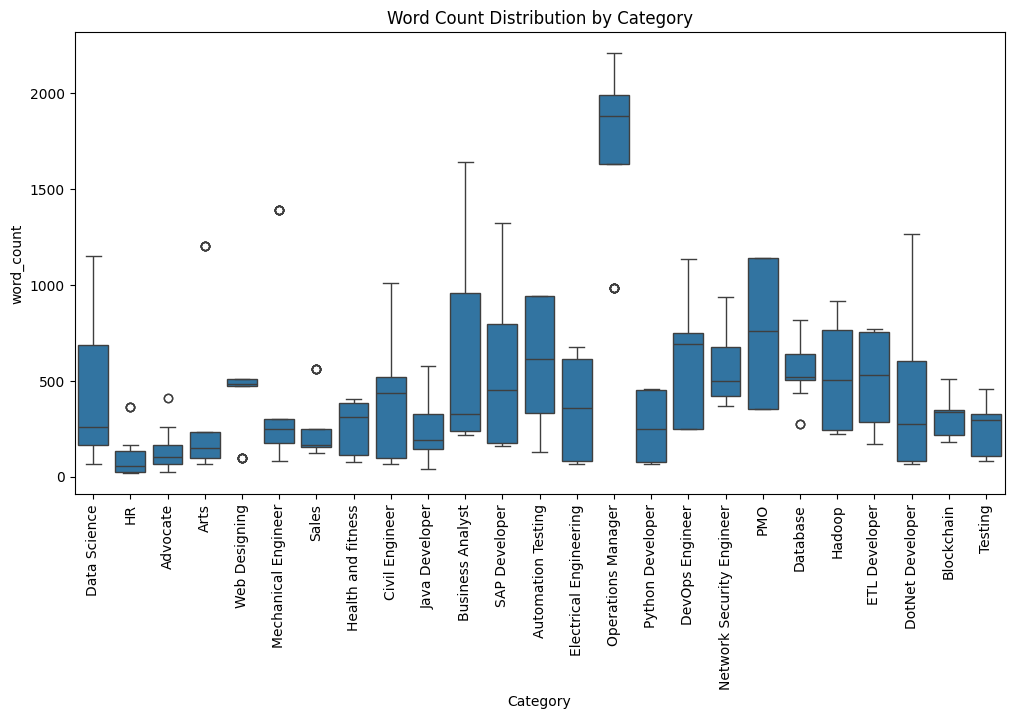

In [10]:
# Category-wise Resume Word Count Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='word_count', data=data)
plt.xticks(rotation=90)
plt.title("Word Count Distribution by Category")
plt.show()


In [11]:
# TF-IDF Analysis
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = vectorizer.fit_transform(data['Resume'])
tfidf_words = vectorizer.get_feature_names_out()
print("\nTop 20 TF-IDF Words:")
print(tfidf_words)



Top 20 TF-IDF Words:
['business' 'company' 'data' 'database' 'description' 'details'
 'development' 'exprience' 'january' 'maharashtra' 'management' 'months'
 'project' 'skill' 'sql' 'team' 'test' 'testing' 'using' 'year']


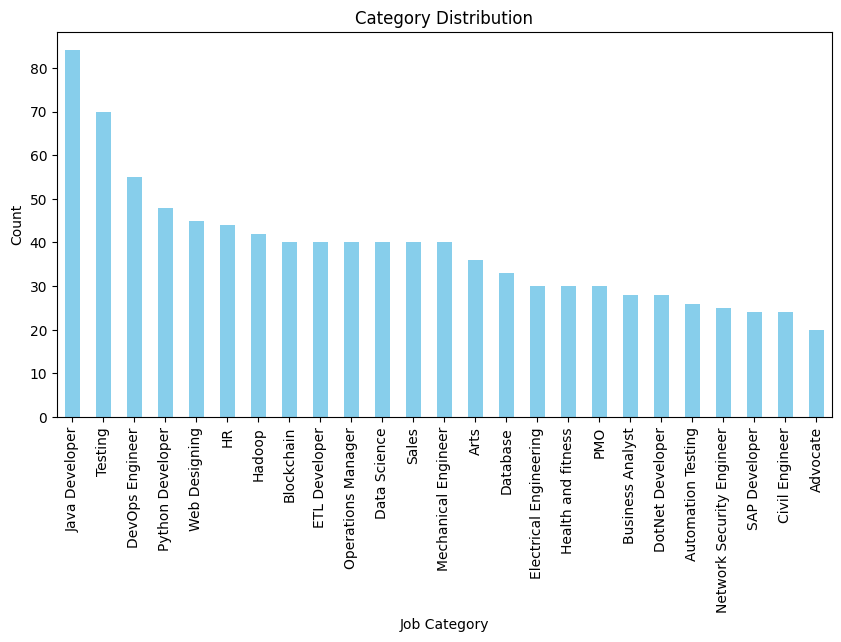

In [12]:
# Category Distribution Visualization
plt.figure(figsize=(10, 5))
data['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Category Distribution")
plt.xlabel("Job Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


In [13]:
# Named Entity Recognition (NER)
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

data['Entities'] = data['Resume'].apply(lambda x: extract_entities(str(x)))
print("\nNamed Entities Extracted from Resumes:")
print(data[['Category', 'Entities']].head())



Named Entities Extracted from Resumes:
       Category                                           Entities
0  Data Science  [(matplotlib, PERSON), (Sql, PERSON), (Java, P...
1  Data Science  [(May 2013, DATE), (May 2017, DATE), (UIT-RGPV...
2  Data Science  [(Areas of Interest Deep Learning, ORG), (Cont...
3  Data Science  [(SAP, GPE), (Tableau, GPE), (SAP HANA PAL, GP...
4  Data Science  [(MCA, ORG), (YMCAUST, ORG), (Faridabad, GPE),...



Sentiment Analysis Summary:
                           sentiment
Category                            
Advocate                    0.083212
Arts                        0.153563
Automation Testing          0.194321
Blockchain                  0.100201
Business Analyst            0.072469
Civil Engineer              0.064567
Data Science                0.009181
Database                    0.079294
DevOps Engineer             0.066260
DotNet Developer            0.017382
ETL Developer               0.102621
Electrical Engineering      0.040032
HR                          0.085539
Hadoop                      0.105028
Health and fitness          0.146171
Java Developer              0.016070
Mechanical Engineer         0.180201
Network Security Engineer   0.025635
Operations Manager          0.106955
PMO                         0.150966
Python Developer            0.140038
SAP Developer               0.133271
Sales                       0.147514
Testing                     0.071309
Web Desig

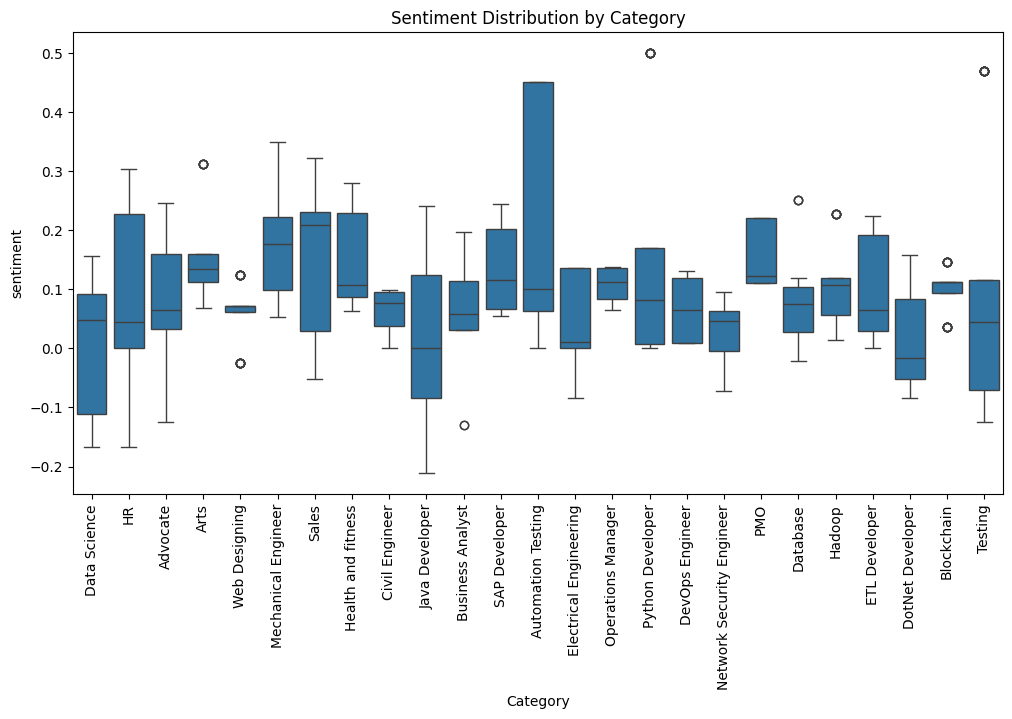

In [14]:
# Sentiment Analysis
data['sentiment'] = data['Resume'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
print("\nSentiment Analysis Summary:")
print(data[['Category', 'sentiment']].groupby('Category').mean())

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='sentiment', data=data)
plt.xticks(rotation=90)
plt.title("Sentiment Distribution by Category")
plt.show()
